# Lesson 6. Numerical integration and differentiation

Numerical integration is based on an approximate calculation of the definite integral in a given interval. The literature often uses the term 'quadrature' (or sometimes 'cubature' for computing two- and multivariate integrals).

We calculate the integral by dividing the integration range into $n$ of equal intervals, calculating the approximate integral in each interval and finally summing up the calculated integrals. The main differences in the basic integration methods lie in the method of approximating the integrals in these intervals.

## The rectangle method

The simplest is the rectangular integration, which approximates the integral in the elementary interval by the product of the interval width and the value of the function at a certain point in the interval (i.e. the area of ​​the rectangle - hence the name). If we choose the value of the beginning of the interval, we are talking about the left-point rule. If we use the end of the interval, it is the right-point rule. The best approximation is given by the mid-point rule, where we choose the function value for the midpoint of the interval as the height of the rectangle. This method can be schematically presented in the figure:

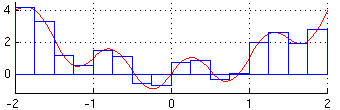

Let's implement it: 

In [ ]:
def integrate(f, a, b, n):
  dx = (b - a) / n
  integr = 0
  for i in range(n):
    x = (i+0.5) * dx + a
    integr += dx * f(x)
  return integr

def f(x):
  return x**2-1

print(integrate(f, 0, 2, 10000))

0.666666659999998


As we can see, this method is not very accurate. Even for a large number of intervals (and loop repetitions), the value is underestimated (for the given function and range, the exact value is $\ frac{2}{3}\approx 0.6666667$

## Trapezoidal rule

A better approximation is provided by the trapezoidal rule, in which we calculate the values at both ends of each interval and then approximate the integrated function with the line segment joining both values. The resulting figure is a trapezoid. The scheme of operation is presented in the figure below:

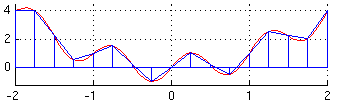

The `numpy` package has a built-in `trapz` function for integrating using this rule. The command syntax is as follows: `numpy.trapz(y, x=None, dx=1.0, axis=-1)`, where `y` is an array of function values in the integration interval, `x` - an array of arguments corresponding to these values. Instead of the `x` array, we can pass the `dx` parameter - the distance between successive arguments (i.e., the elementary integration interval). If neither `x` nor `dx` is given, it defaults to `dx = 1`. The last optional argument is axis - the direction of integration for multivariate functions.

Let's test its operation with an example:

In [ ]:
import numpy as np

def f(x):
  return x**2-1

x=np.linspace(0,2,10000)
print(np.trapz(f(x),x))

0.666666680002667


The `trapz` function has a twin in the` scipy` package. The function `scipy.integrate.trapezoid(y, x=None, dx=1.0, axis=- 1)` provides identical functionality (and syntax).

## Simpson's rule (parabola)

Another rule involves dividing the integration range into an even number of intervals. Then we can perform a quadratic interpolation (Langrange interpolation of the second degree) on each two adjacent intervals (i.e. on three adjacent values of the function). Simply put - we approximate the values of the function in three points with a parabola passing through these points. Let's illustrate this again in the picture:

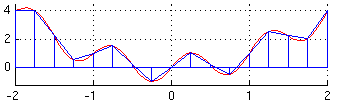

The complete Simpson's integration function can be found in the `scipy` package. Its syntax and usage are identical to those previously known: `scipy.integrate.simps(y, x=None, dx=1.0, axis=- 1, even='avg')`. The only difference is the last argument `even`, which can take three values: `first`, `last`, or `avg`. This argument (true to its name) governs the behavior of the algorithm with an odd number of intervals (that is, an even number of values of the vector `y`). `even=first` uses the Simpson rule for the first $n-2$ intervals and the trapezoidal rule for the last. `even=last` uses the trapezoidal rule for the first interval and the Simpson's rule for the rest. Finally, `even=avg` (default) uses the arithmetic mean of both variants.
> Note! In newer versions of the `scipy` package, the `integrate.simps()` function has been replaced by `integrate.simpson()`.

Let's check the operation in an example:

In [ ]:
import numpy as np
from scipy import integrate

def f(x):
  return np.log10(x+1)

x=np.linspace(0,10,10000)
print(integrate.simps(f(x),x, even='first'))
print(integrate.simps(f(x),x, even='last'))
print(integrate.simps(f(x),x))

7.112374717707652
7.112374717671786
7.112374717689718


## Gaussian quadrature

Gaussian quadrature is an advanced method of numerical integration, significantly increasing the accuracy of calculations. In this method, the range of integration is not divided into equal segments, but the step width is variable. Additionally, in each node, the value of the function is multiplied by a certain weight. The weights and nodal points are chosen so that the interpolated function best reflects the integral function. The `scipy.integrate` module provides several integration functions with different variants of this method. The following are available, among others:
* `scipy.integrate.quadrature()` - integration by adaptive Gaussian method with fixed tolerance
* `scipy.integrate.fixed_quad()` - fixed order Gaussian integration
* `scipy.integrate.quad()` - integration method from Fortran QUADPACK library
* `scipy.integrate.newton_cote ()` - returns the weights and error rate for the Newton-Cotes method.

As you can see, the possibilities of numerical integration with the `scipy` package are very extensive. There is also a separate function that explains the additional parameters of the` quad () `function:

In [9]:
from scipy import integrate
integrate.quad_explain()


    Compute a definite integral.

    Integrate func from `a` to `b` (possibly infinite interval) using a
    technique from the Fortran library QUADPACK.

    Parameters
    ----------
    func : {function, scipy.LowLevelCallable}
        A Python function or method to integrate.  If `func` takes many
        arguments, it is integrated along the axis corresponding to the
        first argument.

        If the user desires improved integration performance, then `f` may
        be a `scipy.LowLevelCallable` with one of the signatures::

            double func(double x)
            double func(double x, void *user_data)
            double func(int n, double *xx)
            double func(int n, double *xx, void *user_data)

        The ``user_data`` is the data contained in the `scipy.LowLevelCallable`.
        In the call forms with ``xx``,  ``n`` is the length of the ``xx``
        array which contains ``xx[0] == x`` and the rest of the items are
        numbers contained in the ``ar

## Integration and differentiation of polynomials

In the previous lesson, we learned about the methods `e.g.roots()` and `e.g. poly()` that calculate polynomial roots and coefficients, respectively. The `numpy` package also provides functions that allow you to integrate and differentiate polynomials easily. To calculate integrals, use the `polyint` command with the syntax` numpy.polyint(p, m=1, k=None)`, where `p` is an coefficient array, `m` is the order of the integral ($1$ by default) and `k` is an integration constant ($0$ by default).

Let's find the integral of the polynomial $w(x)=4x^3-6x^2+8x-1$ assuming $C=0.5$:

In [ ]:
import numpy as np

w=np.array([4, -6,8,-1])
print(np.polyint(w,k=0.5))

[ 1.  -2.   4.  -1.   0.5]


As we can see, the result is $\int w(x)=x^4-2x^3+4x^2-x+0.5$

Similarly, we can compute polynomial derivatives using the function `numpy.polyder(p, m=1)`. As in the previous example, `p` is a sequence of coefficients and `m` is an optional derivative order ($1$ by default).

In [ ]:
import numpy as np

W=np.array([1, -2, 4, -1, 0.5])
print(np.polyder(W))

[ 4. -6.  8. -1.]


For the sake of completeness, let's mention that there are also `polyadd`,` polysub`, `polymul`, and` polydiv` functions, which perform arithmetic operations on polynomials, as well as the `polyval` function that calculates the value of a polynomial at a given point:

In [ ]:
import numpy as np

w = np.array([1, -2, 4, -1, 0.5])
v = np.array([-2, 3, 10])

print(np.polyval(w, 3.25))
print(np.polyadd(w, v))
print(np.polysub(w, v))
print(np.polysub(v, w))
print(np.polymul(w, v))
print(np.polydiv(w, v))

82.41015625
[ 1.  -2.   2.   2.  10.5]
[ 1.  -2.   6.  -4.  -9.5]
[-1.   2.  -6.   4.   9.5]
[-2.   7.  -4.  -6.  36.  -8.5  5. ]
(array([-0.5  ,  0.25 , -4.125]), array([ 8.875, 41.75 ]))


Note that the division result consists of two polynomials: the result of the division and the remainder of the division.

# Differentiation of any function

In the simplest terms, numerical differentiation consists in calculating the difference of the value of a function at two points (interval ends) and dividing it by the distance between these points (interval width). In case of finite difference, three basic types are commonly considered: forward, backward, and central finite differences. They are illustrated in the figure:

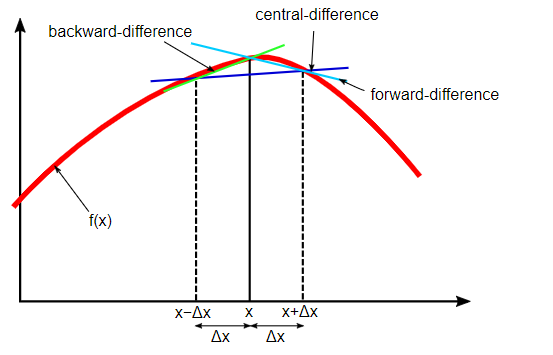

As we have seen, the `numpy` package does not provide convenient tools for numerically differentiating arbitrary functions. Fortunately for us, this functionality is available in the `scipy` package. It is provided by the  `scipy.misc.derivative(f, x0, dx=1.0, n=1, args=(), order=3)` function. The obligatory arguments are the function and the point at which we want to compute the derivative. Optionally, we can specify the width of the difference interval `dx` ($1$ by default), the order of the derivative `n` ($1$ by default), the number of `order` nodes (must be odd, $3$ by default) and a tuple of additional arguments. The function computes the derivative at the central node. Let's check the operation on an example:

In [1]:
from scipy import misc
from math import sin, pi

def f(x):
  return sin(x)
print(misc.derivative(f, 0, 0.0001))
print(misc.derivative(f, pi/2, 0.1))
print(misc.derivative(f, pi, 0.01))

0.9999999983333334
0.0
-0.9999833334166451


## Polynomials again

Finally we should mention, that as of `numpy` version $1.4$ a new class, `numpy.polynomial`, has been introduced. It redefines a more consistent interface and additionally allows polynomial arithmetic operations with use of the standard operators `+`,  `-`,  `*` and `/`. Let's check its operation:

In [2]:
from numpy.polynomial import Polynomial

w = Polynomial([2, 3, -2, 4])
v = Polynomial([0, 1, 3])
print(w)
print(type(w))
w

poly([ 2.  3. -2.  4.])
<class 'numpy.polynomial.polynomial.Polynomial'>


Polynomial([ 2.,  3., -2.,  4.], domain=[-1,  1], window=[-1,  1])

In [3]:
v

Polynomial([0., 1., 3.], domain=[-1,  1], window=[-1,  1])

In [4]:
w+v

Polynomial([2., 4., 1., 4.], domain=[-1.,  1.], window=[-1.,  1.])

In [5]:
w.deriv()

Polynomial([ 3., -4., 12.], domain=[-1.,  1.], window=[-1.,  1.])

In [6]:
v.integ(k=10)

Polynomial([10. ,  0. ,  0.5,  1. ], domain=[-1.,  1.], window=[-1.,  1.])

In [7]:
w(2)

32.0

## Literature

As mentioned, our lessons are only a short introduction to the most basic concepts of numerical computing. The interested reader is referred to the literature on the subject. We especially recommend following items:
1. Hans Petter Langtangen, *Primer on Scientific Programming with Python*, Springer; 4th edition (August 2, 2014)
1. Christian Hill, *Learning Scientific Programming with Python*, Cambridge University Press; 2nd edition (November 12, 2020)

There are also countless free online tutorials, examples, demos, and entire courses and textbooks.
